# Introduction to PCA in order to support Cluster analysis

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

Start with the penguins data set again.

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Why PCA????

The penguins data has 4 numeric columns.

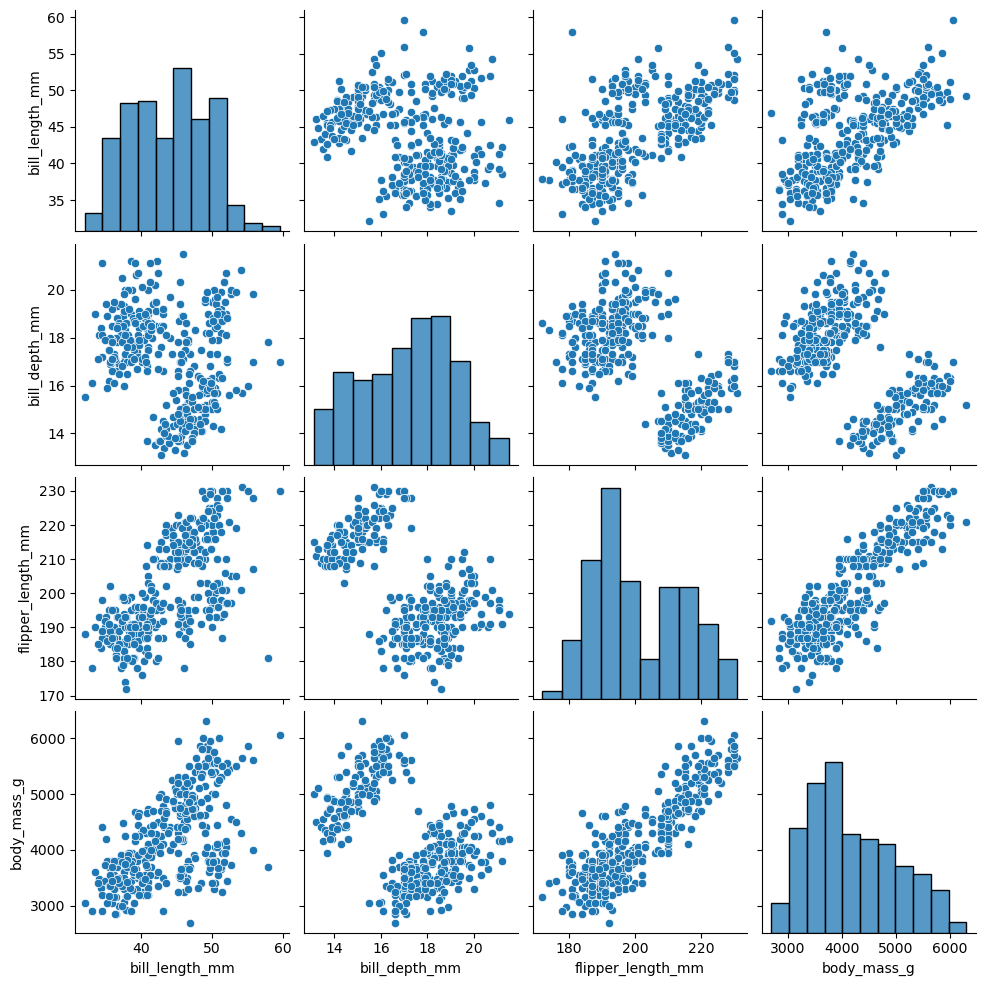

In [4]:
sns.pairplot(data = penguins)

plt.show()

There is a clear relationship or correlation structure between several of the numeric columns.

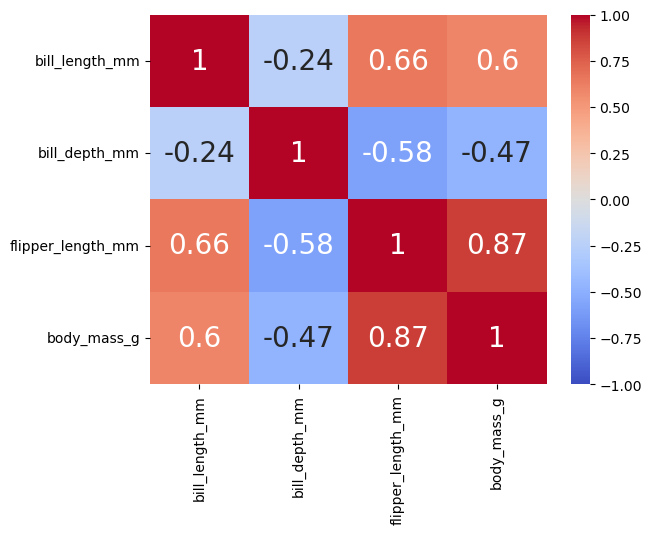

In [5]:
fig, ax = plt.subplots()

sns.heatmap(data = penguins.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'fontsize': 20},
            ax=ax)

plt.show()

Why PCA?????

PCA tries to EXPLOIT correlation between variables. This is beneficial because maybe we do NOT actually need to look at ALL pairs of scatter plots!!!

If we can expoit the RELATIONSHIP between variables, maybe we can CREATE NEW variables that CAPTURE the impact or influence of ALL variables!

Then instead of having to explore a large number of figures, we can focus on the relationship between several NEWLY created variables!!!!!!

PCA will be discussed in more detail CMPINF 2120. We will also revisit PCA later in the semester in this course CMPINF 2100. But for now lets just see how to **USE** PCA to support visualization.

## Executing PCA

Before executing PCA, we **MUST** deal with MISSINGS such as DROPPING THEM! Also, it is HIGHLY RECOMMENDED that you **STANDARDIZE** the variables BEFORE applying PCA!!!!!

In [6]:
pens_clean = penguins.dropna().copy()

In [7]:
pens_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Standardize using `StandardScaler()` method from scikit-learn.

In [8]:
from sklearn.preprocessing import StandardScaler

Standardize NUMERIC columns!!!!

In [9]:
pens_clean_features = pens_clean.select_dtypes('number').copy()

In [10]:
Xpens = StandardScaler().fit_transform( pens_clean_features )

We can use the `PCA()` method from scikit-learn to execute the TRANSFORMATION!!!!!

The transformation produces NEW variables that ACCOUNT for the relationship between ALL of the original numeric variables!

In [11]:
from sklearn.decomposition import PCA

`PCA()` follows the LOGIC of `StandardScaler()`. We must:

* INITIALIZE our assumptions
* FIT the OBJECT using our assumptions
* TRANSFORM a data set using the FITTED object

The main assumption we need for `PCA()` is the NUMBER OF COMPONENTS or the number of **NEWLY CREATED VARIABLES** to produce.

We will NOT discuss how to decide the BEST number of new variables today. Instead, we just focus on 2 because we will VISUALIZE 2 numeric variables via scatter plots!

Apply PCA in 1 line of code by INITIALIZING then FITTING and TRANSFORMING!!!!!

In [12]:
pca_pens = PCA(n_components=2).fit_transform( Xpens )

In [13]:
type( pca_pens )

numpy.ndarray

In [14]:
pca_pens.shape

(333, 2)

In [15]:
Xpens.shape

(333, 4)

In [16]:
pens_clean_features.shape

(333, 4)

Convert the NumPy array `pca_pens` into a DataFrame to support visualization. 

Name the columns `'pc01'` and `pc02'`.

In [17]:
pca_pens_df = pd.DataFrame( pca_pens, columns=['pc01', 'pc02'] )

In [18]:
pca_pens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    333 non-null    float64
 1   pc02    333 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


Visualize the relationship between these two NEWLY created variables as a scatter plot.

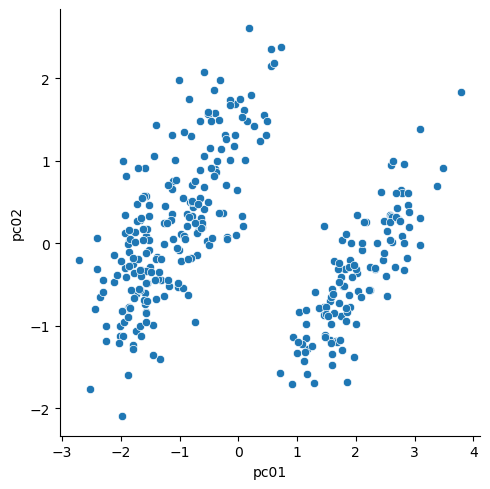

In [19]:
sns.relplot(data = pca_pens_df, x='pc01', y='pc02')

plt.show()

Let's calculate the CORRELATION MATRIX between these two new variables!

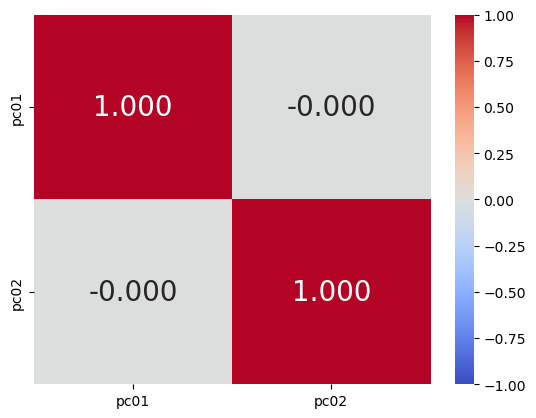

In [23]:
fig, ax = plt.subplots()

sns.heatmap( pca_pens_df.corr(numeric_only=True),
             vmin=-1, vmax=1, center=0,
             cmap='coolwarm',
             annot=True, annot_kws={'fontsize': 20}, fmt='.3f',
             ax=ax)

plt.show()

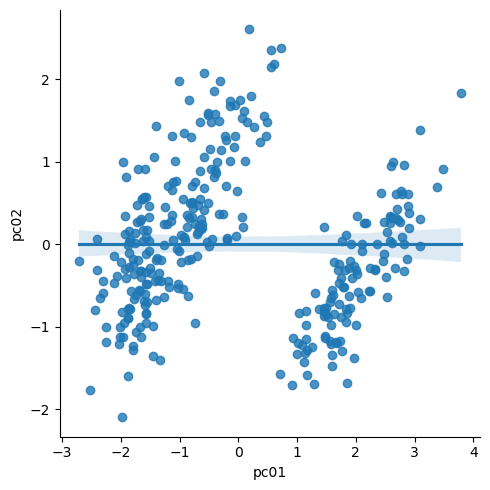

In [24]:
sns.lmplot(data = pca_pens_df, x='pc01', y='pc02')

plt.show()

But...we can include GROUPING Variables with our PCA!!!

In [25]:
pca_pens_df['species'] = pens_clean.species

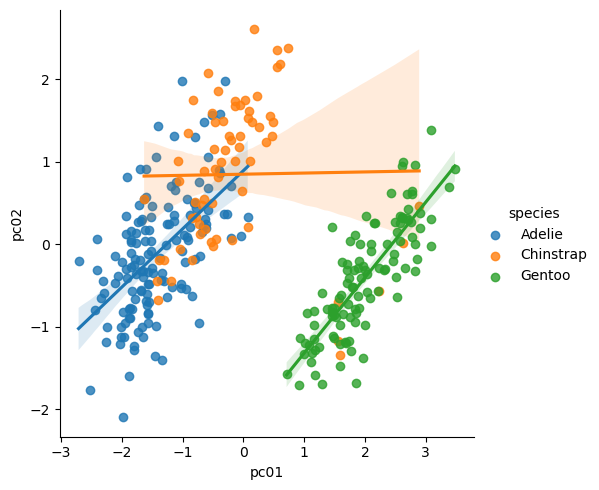

In [26]:
sns.lmplot(data = pca_pens_df, x='pc01', y='pc02', hue='species')

plt.show()

We saw it was easy to SEPARATE the penguins into 2 clusters!!!

The PCA or the NEWLY CREATED variables are EASILY identifying the 2 PRIMARY GROUPS in the data!!!!!

## Clustering and PCA

Instead of visualizing the Clustering results on the ORIGINAL variables, let's visualize the CLUSTERING results with the NEWLY created PCA!!!!!

In [27]:
from sklearn.cluster import KMeans

In [28]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(Xpens)

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
pca_pens_df['k2'] = pd.Series( clusters_2, index=pca_pens_df.index ).astype('category')

In [30]:
pca_pens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   pc01     333 non-null    float64 
 1   pc02     333 non-null    float64 
 2   species  324 non-null    object  
 3   k2       333 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 8.4+ KB


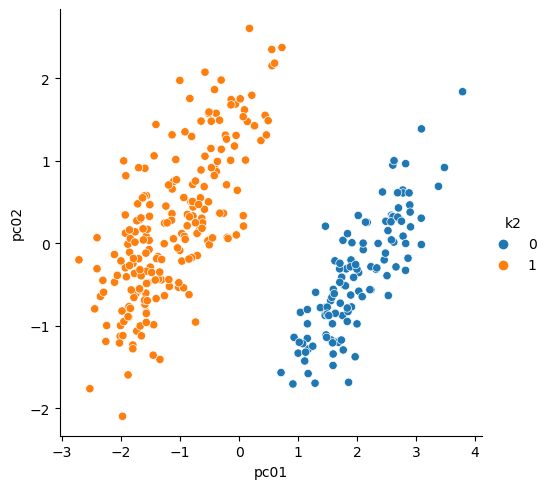

In [31]:
sns.relplot(data = pca_pens_df, x='pc01', y='pc02', hue='k2')

plt.show()

## Larger example

On Canvas there is the WINE DATA SET.

In [32]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [33]:
wine_names = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanin', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

In [34]:
wine_data = pd.read_csv(wine_url, names=wine_names)

In [35]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivar              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanin        178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [36]:
wine_data.isna().sum()

Cultivar                0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanin          0
Color_intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

In [37]:
wine_data.nunique()

Cultivar                  3
Alcohol                 126
Malic_acid              133
Ash                      79
Alcalinity_of_ash        63
Magnesium                53
Total_phenols            97
Flavanoids              132
Nonflavanoid_phenols     39
Proanthocyanin          101
Color_intensity         132
Hue                      78
OD280_OD315             122
Proline                 121
dtype: int64

In [38]:
wine_data.Cultivar.value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

Convert `Cultivar` to be a CATEGORICAL variable.

In [39]:
wine_data['Cultivar'] = wine_data.Cultivar.astype('category')

Why will PCA help here....

We could make the PAIRS PLOT between all 13 numeric columns...

This is INFORMATION OVERLOAD!!!!

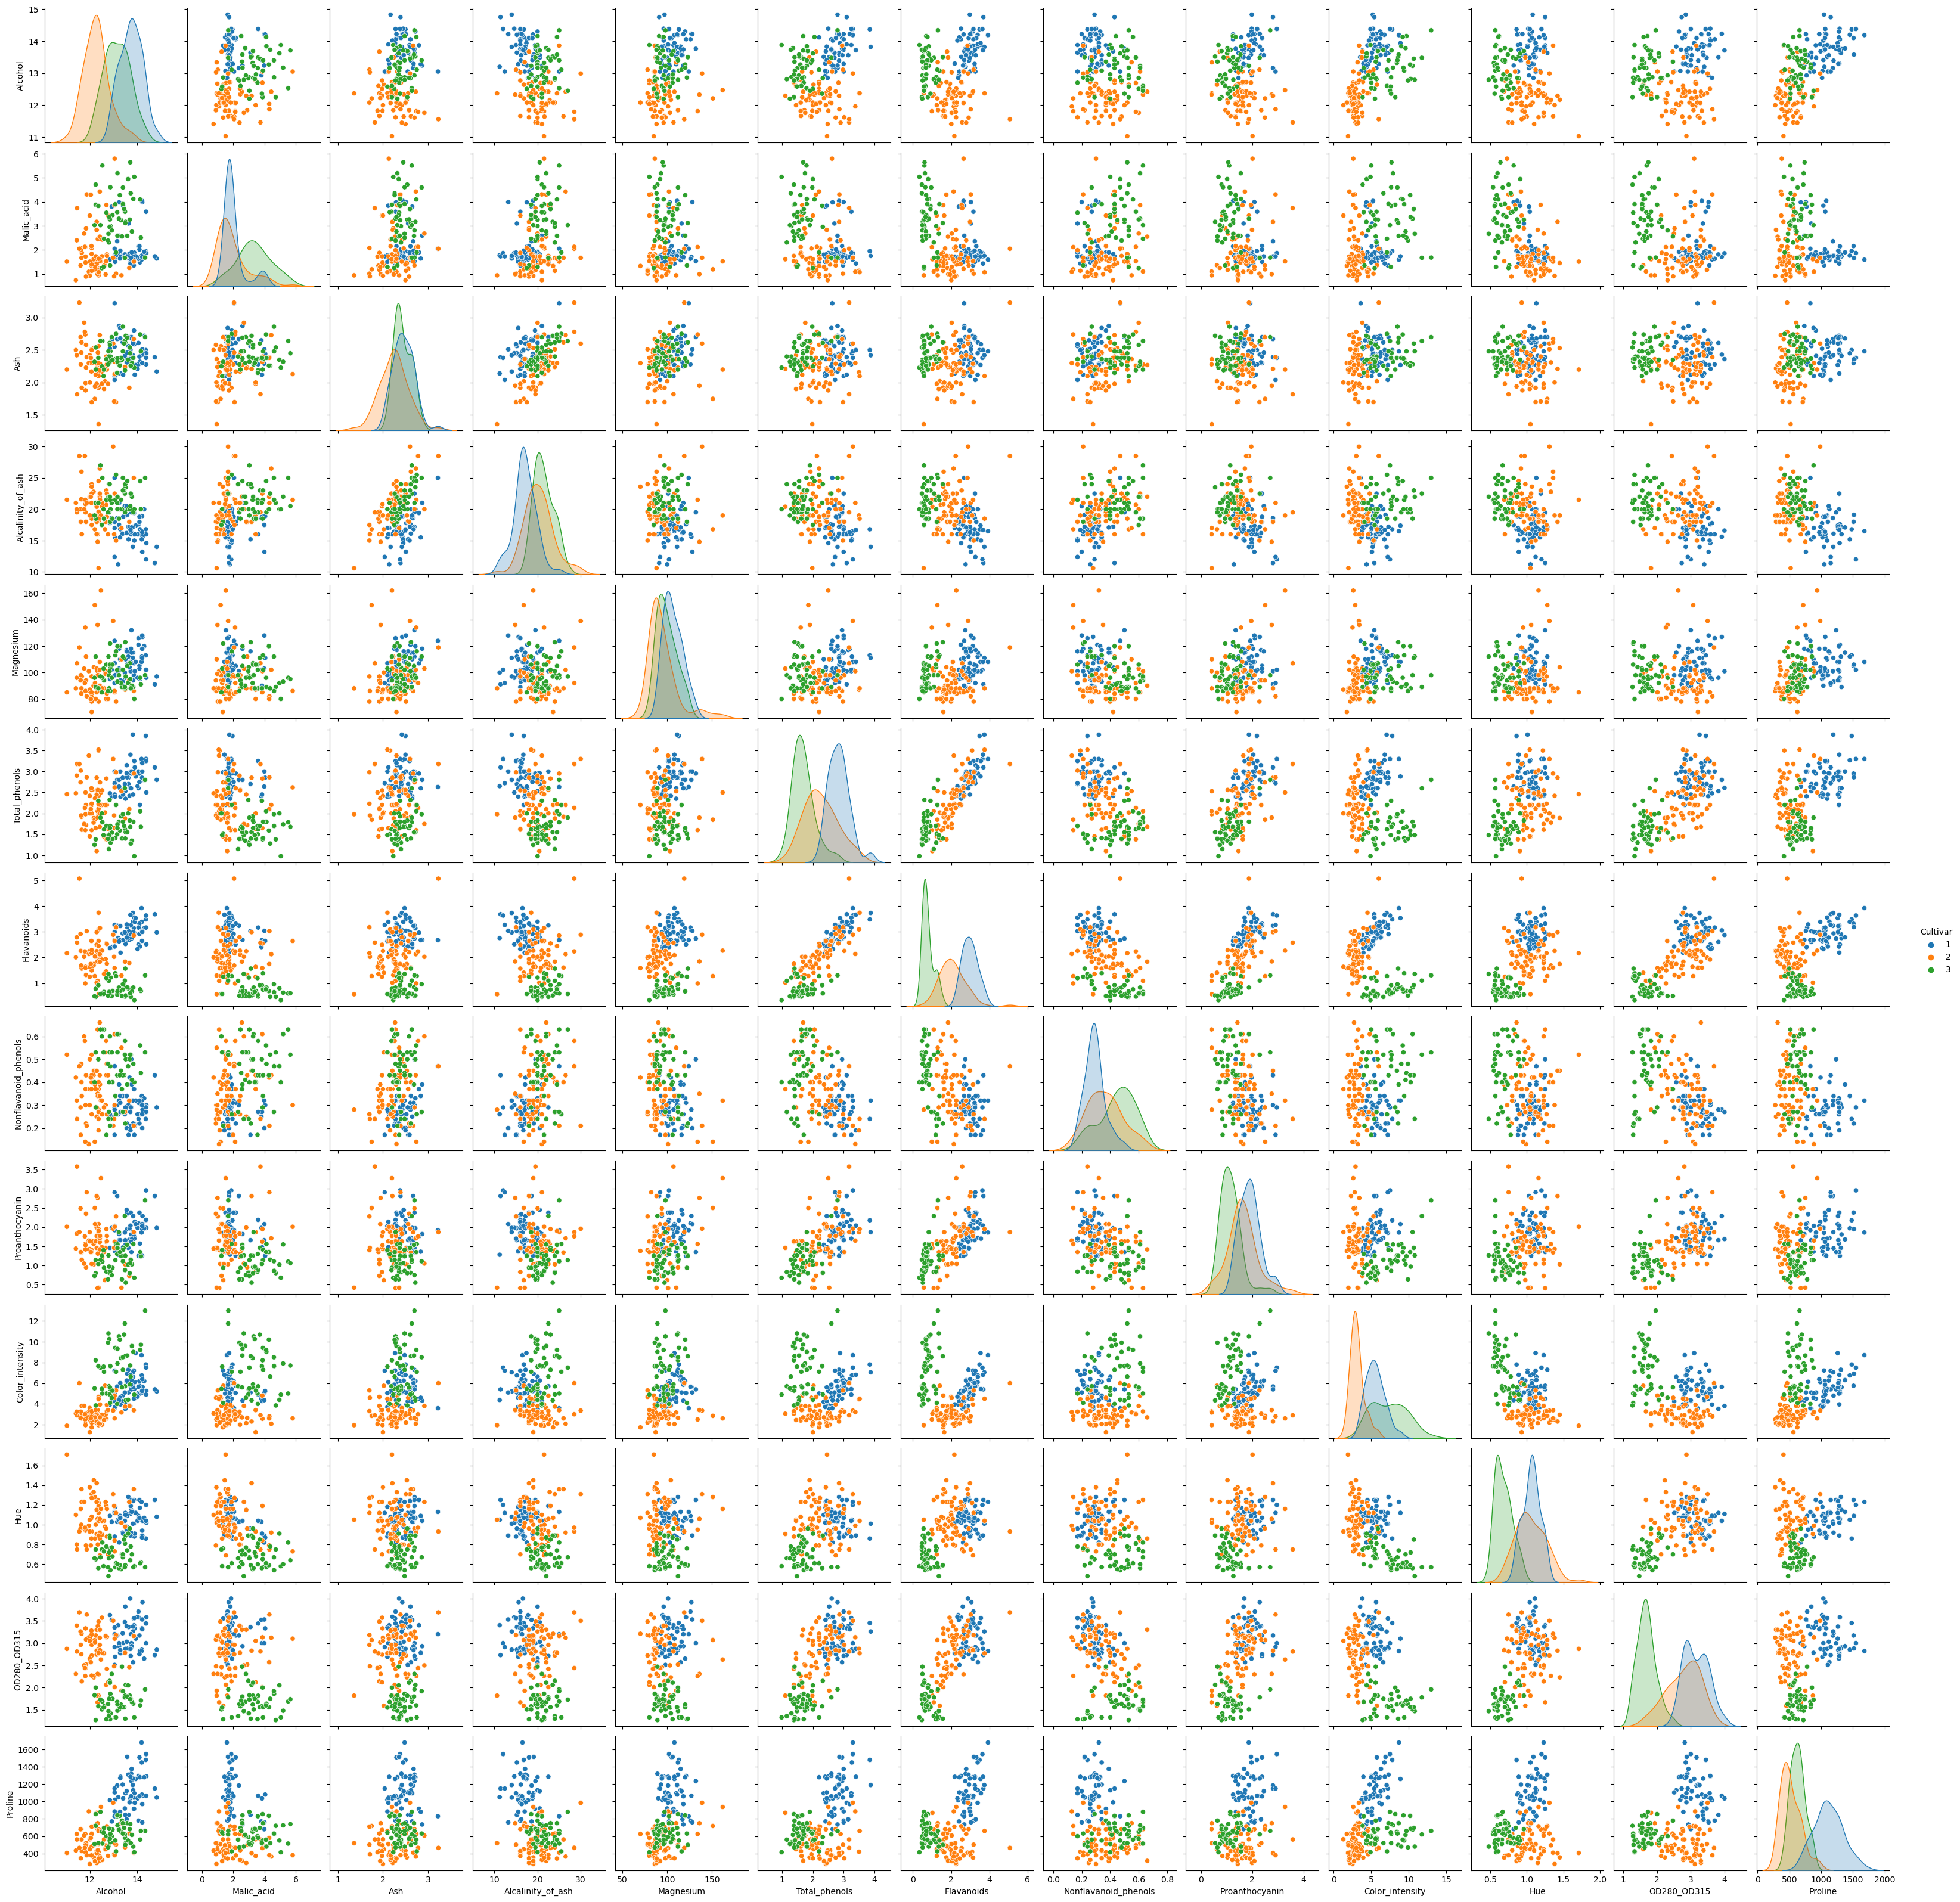

In [40]:
sns.pairplot(data = wine_data, hue='Cultivar', diag_kws={'common_norm': False})

plt.show()

PCA allows us to EXPLOIT relationships between the columns!!!!

We know if there are relationships by creating CORRELATION PLOTS!!!

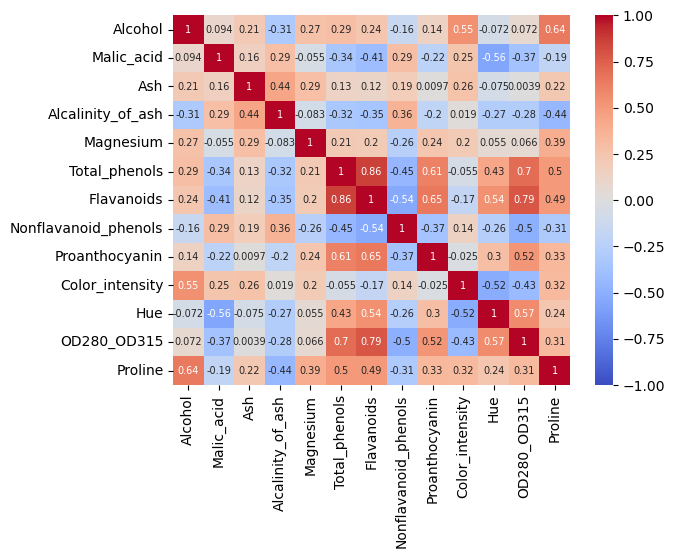

In [41]:
fig, ax = plt.subplots()

sns.heatmap(data = wine_data.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            annot=True, annot_kws={'fontsize': 7},
             cmap='coolwarm',
            ax=ax)

plt.show()

BEFORE we execute PCA we need to check the MAGNTIDUE and SCALES!

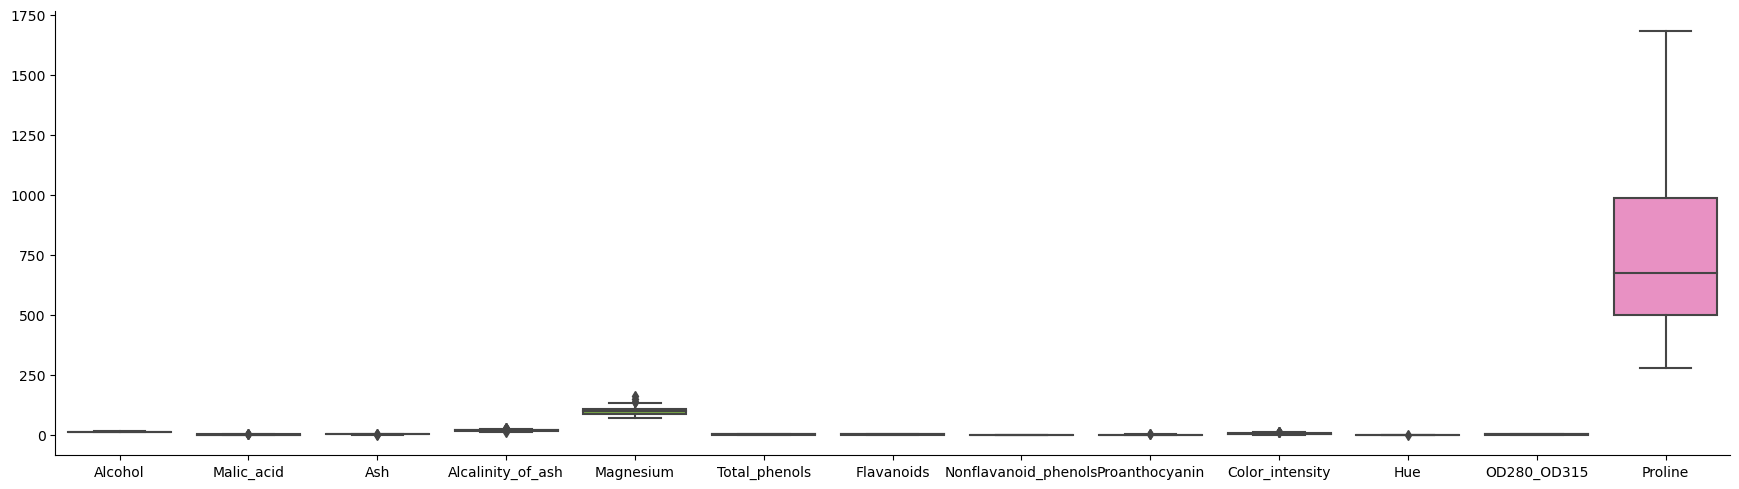

In [42]:
sns.catplot(data = wine_data, kind='box', aspect=3.5)

plt.show()

We MUST STANDARDIZE to remove the SCALE EFFECT!

In [43]:
wine_features = wine_data.select_dtypes('number').copy()

In [44]:
Xwine = StandardScaler().fit_transform( wine_features )

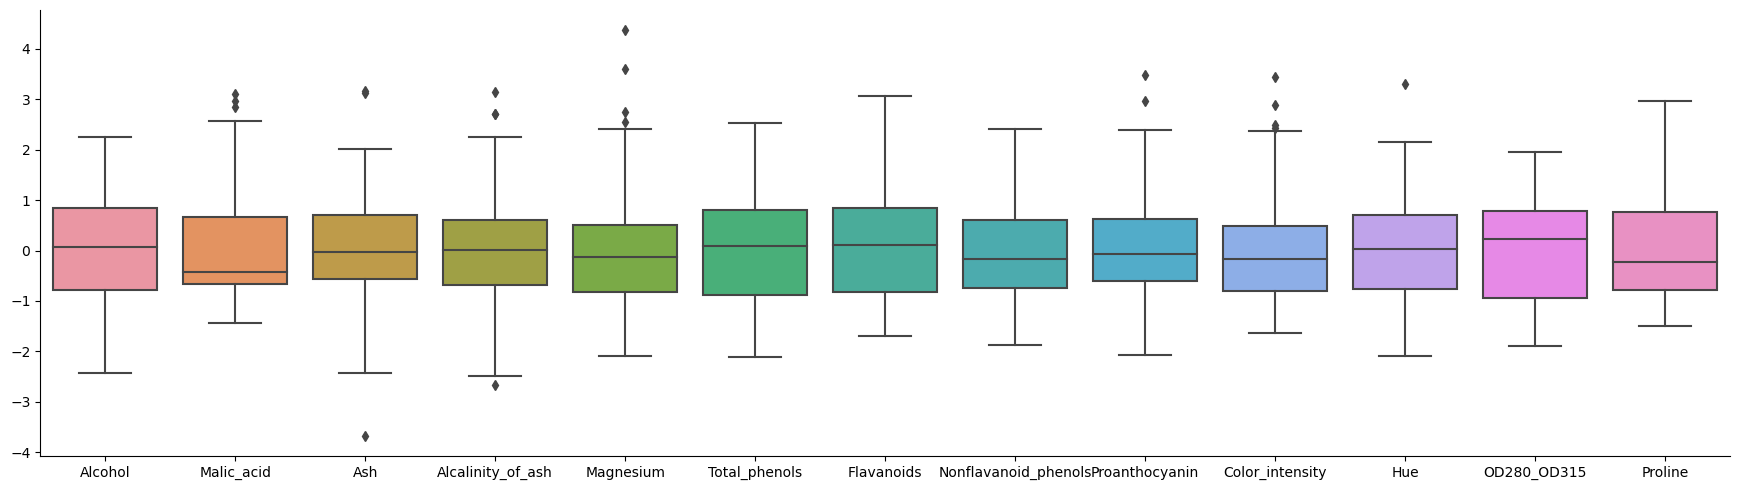

In [45]:
sns.catplot(data = pd.DataFrame(Xwine, columns=wine_features.columns), kind='box', aspect=3.5)

plt.show()

Execute PCA and return 2 newly created variables!!!

In [46]:
pca_wine = PCA(n_components=2).fit_transform( Xwine )

In [47]:
pca_wine_df = pd.DataFrame( pca_wine, columns=['pc01', 'pc02'] )

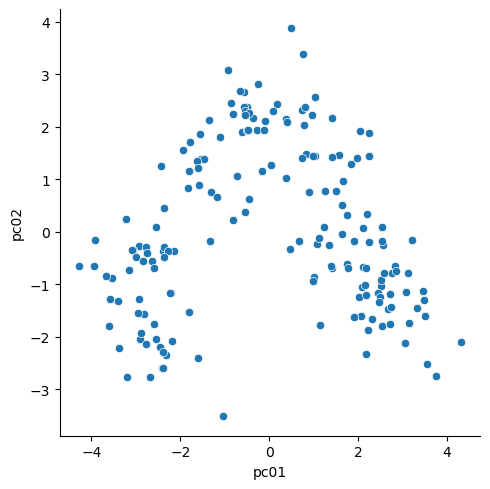

In [48]:
sns.relplot(data = pca_wine_df, x='pc01', y='pc02' )

plt.show()

Add in the KNOWN GROUPINGS!

In [49]:
pca_wine_df['Cultivar'] = wine_data.Cultivar

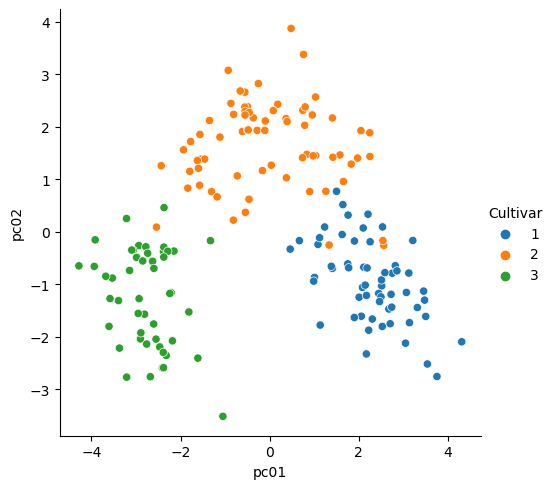

In [50]:
sns.relplot(data = pca_wine_df, x='pc01', y='pc02', hue='Cultivar')

plt.show()

Run KMeans with 3 clusters and visualize the 3 cluster labels with the NEWLY CREATED PCA!!!

In [51]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( Xwine )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
pca_wine_df['k3'] = pd.Series( clusters_3, index=pca_wine_df.index ).astype('category')

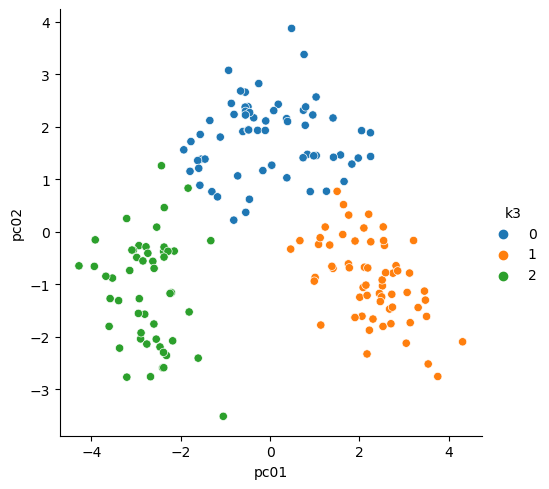

In [53]:
sns.relplot(data = pca_wine_df, x='pc01', y='pc02', hue='k3')

plt.show()

## A really big example!!!!

Use the Sonar data!

In [54]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [55]:
sonar_df = pd.read_csv(sonar_url, header=None)

In [56]:
sonar_df.shape

(208, 61)

In [57]:
sonar_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

Convert the column names to strings.

In [58]:
sonar_df.columns = ['X%02d' % d for d in sonar_df.columns]

In [59]:
sonar_df.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60'],
      dtype='object')

In [60]:
sonar_df.nunique()

X00    177
X01    182
X02    190
X03    181
X04    193
      ... 
X56    121
X57    124
X58    119
X59    109
X60      2
Length: 61, dtype: int64

In [61]:
sonar_df.X60.value_counts()

M    111
R     97
Name: X60, dtype: int64

In [63]:
sonar_df.isna().sum().max()

0

Let's look at the correlation structure between ALL numeric columns!!!

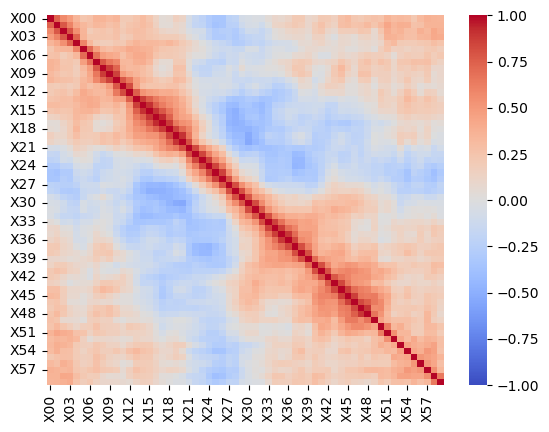

In [64]:
fig, ax = plt.subplots()

sns.heatmap(data = sonar_df.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

Even though there are 60 numeric columns many of the variables are HIGHLY CORRELATED!!!

Let's exploit the correlation through PCA!!!!

But we must first check the SCALES!

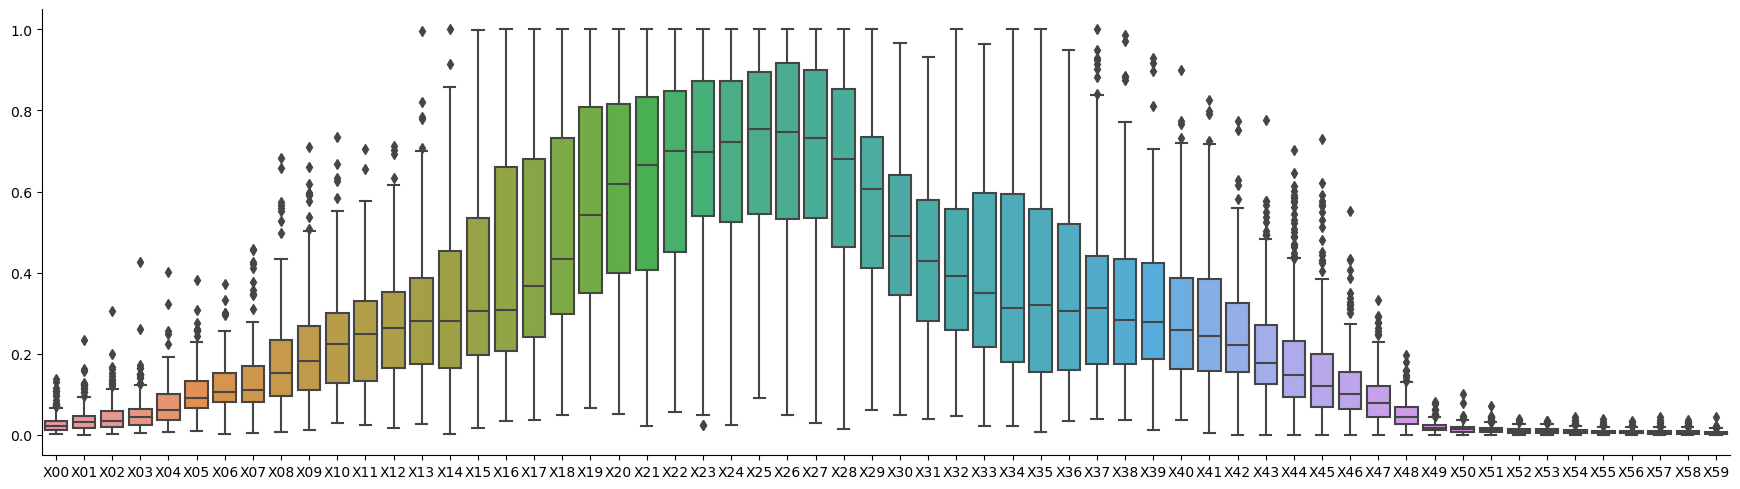

In [65]:
sns.catplot(data = sonar_df, kind='box', aspect=3.5)

plt.show()

The SCALES are NOT the same across the columns. We therefore need to standardize!!!

In [66]:
sonar_features = sonar_df.select_dtypes('number').copy()

In [67]:
Xsonar = StandardScaler().fit_transform( sonar_features )

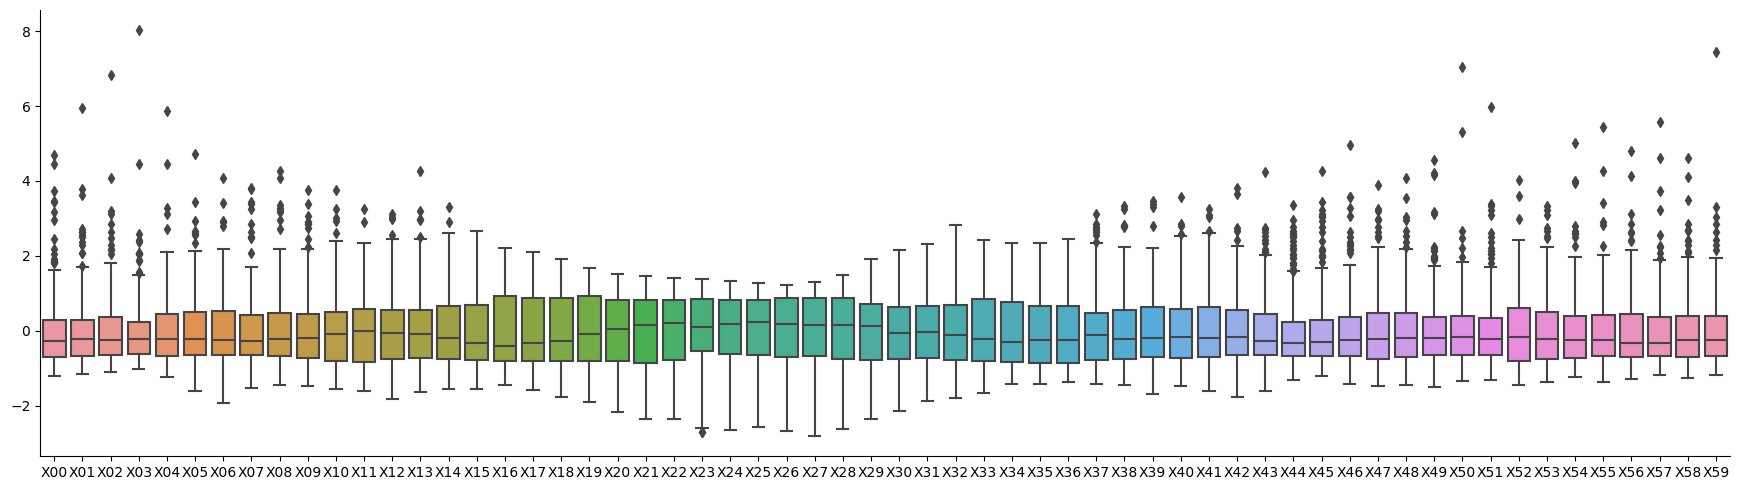

In [68]:
sns.catplot(data = pd.DataFrame(Xsonar, columns=sonar_features.columns), kind='box', aspect=3.5)

plt.show()

APPLY PCA and return 2 NEWLY created variables to support visualization!!!

In [69]:
sonar_pca = PCA(n_components=2).fit_transform( Xsonar )

In [70]:
sonar_pca.shape

(208, 2)

In [71]:
Xsonar.shape

(208, 60)

In [72]:
sonar_pca_df = pd.DataFrame( sonar_pca, columns=['pc01', 'pc02'])

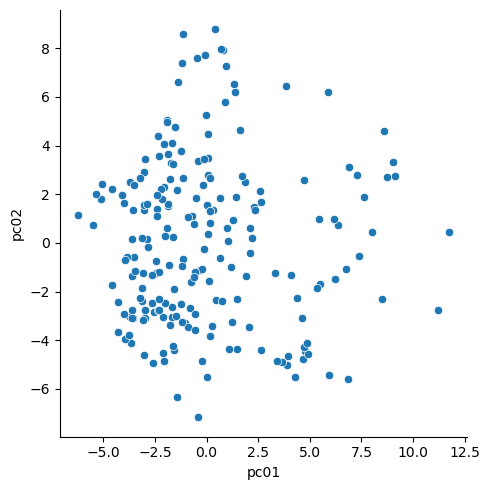

In [73]:
sns.relplot(data = sonar_pca_df, x='pc01', y='pc02')

plt.show()

Color by the categorical variable.

In [74]:
sonar_pca_df['X60'] = sonar_df.X60

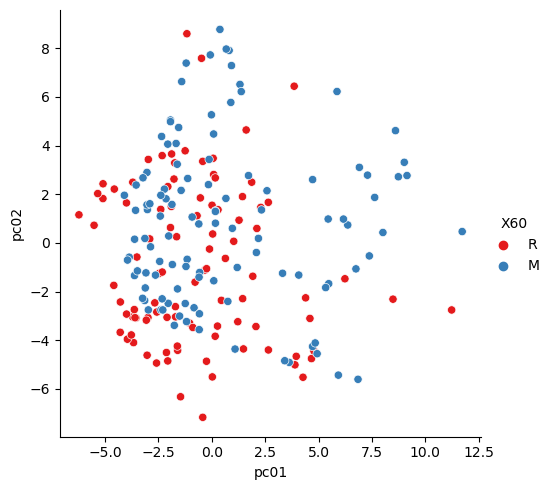

In [76]:
sns.relplot(data = sonar_pca_df, x='pc01', y='pc02', hue='X60', palette='Set1')

plt.show()